In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

import random

from sklearn.metrics import confusion_matrix

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Reshape

Using TensorFlow backend.


#### Загрузим датасет

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Имеем 60000 картинок 28*28

In [3]:
# size, img_rows, img_cols = (60000, 28, 28)
size, img_rows, img_cols = X_train.shape

#### Посмотрим на распределение значений

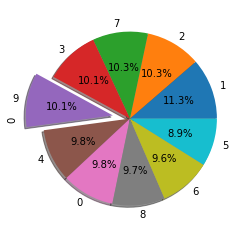

In [4]:
explode = (0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0)
pd.DataFrame(y_test)[0].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, explode=explode)
plt.show()

#### Посмотрим на несколько первых картинок

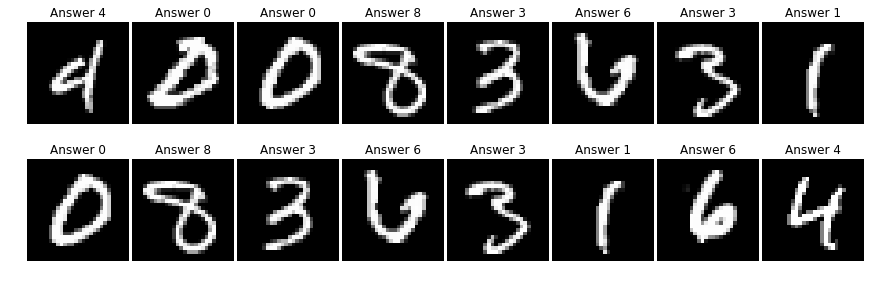

In [5]:
num_rows, num_cols = 2, 8

np.random.seed(42)

rand_num = np.random.randint(0, X_train.shape[0], num_rows*num_cols)
sample_digits = X_train[rand_num]
sample_labels = y_train[rand_num]
# code to view the images

f, A = plt.subplots(num_rows, num_cols, figsize=(15,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for i in range(num_rows):
    for j in range(num_cols):
        image_index = i*num_rows + j
        A[i,j].axis("off")
        A[i,j].imshow(sample_digits[image_index], cmap='gray')
        A[i,j].set_title('Answer %d' % sample_labels[image_index])
plt.show()

#### Нормируем значения

In [6]:
X_train_norm = X_train/np.max(X_train)
X_test_norm = X_test/np.max(X_test)

#### Сделаем целевой признак категориальным

In [7]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)
# n_claddes = 10
n_classes = y_test_cat.shape[1]

#### Построим перцептрон с 2мя скрытыми слоями, relu показала себя лучше tanh

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dropout(0.5))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total para

In [9]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### Обучим модель, можно использовать куда меньшее количество эпох, тк скорость обучения падает с каждой эпохой

In [10]:
batch_size=512
epochs=100
history = model.fit(X_train_norm, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_norm, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 80us/step - loss: 1.0453 - acc: 0.6538 - val_loss: 0.3169 - val_acc: 0.9135
Epoch 2/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.5367 - acc: 0.8357 - val_loss: 0.2348 - val_acc: 0.9338
Epoch 3/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.4257 - acc: 0.8700 - val_loss: 0.1860 - val_acc: 0.9459
Epoch 4/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.3710 - acc: 0.8889 - val_loss: 0.1628 - val_acc: 0.9522
Epoch 5/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.3327 - acc: 0.9001 - val_loss: 0.1452 - val_acc: 0.9593
Epoch 6/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.3033 - acc: 0.9088 - val_loss: 0.1286 - val_acc: 0.9624
Epoch 7/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.2823 - acc: 0.9154 - val_loss: 0.1206 - 

60000/60000 [==============================] - 3s 48us/step - loss: 0.1345 - acc: 0.9589 - val_loss: 0.0613 - val_acc: 0.9799
Epoch 60/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.1277 - acc: 0.9599 - val_loss: 0.0636 - val_acc: 0.9803
Epoch 61/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1329 - acc: 0.9594 - val_loss: 0.0627 - val_acc: 0.9802
Epoch 62/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1314 - acc: 0.9591 - val_loss: 0.0623 - val_acc: 0.9815
Epoch 63/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1278 - acc: 0.9613 - val_loss: 0.0603 - val_acc: 0.9807
Epoch 64/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1276 - acc: 0.9615 - val_loss: 0.0606 - val_acc: 0.9813
Epoch 65/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1298 - acc: 0.9612 - val_loss: 0.0607 - val_acc: 0.9813
Epoch 66/100
60000/60000 [==============

In [11]:
score = model.evaluate(X_test_norm, y_test_cat, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 55us/step
Test loss: 0.059056829361175185
Test accuracy: 0.9819


#### Посмотрим на матрицу ошибок

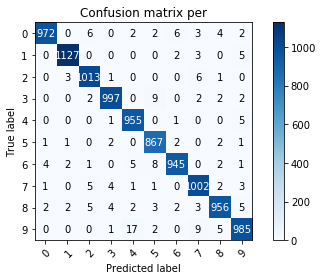

In [12]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
model_pred = model.predict_classes(X_test_norm)
cor_answer = np.array(y_test)
plot_confusion_matrix(model_pred, cor_answer, title='Confusion matrix per')

#### Построим график точности при обучении

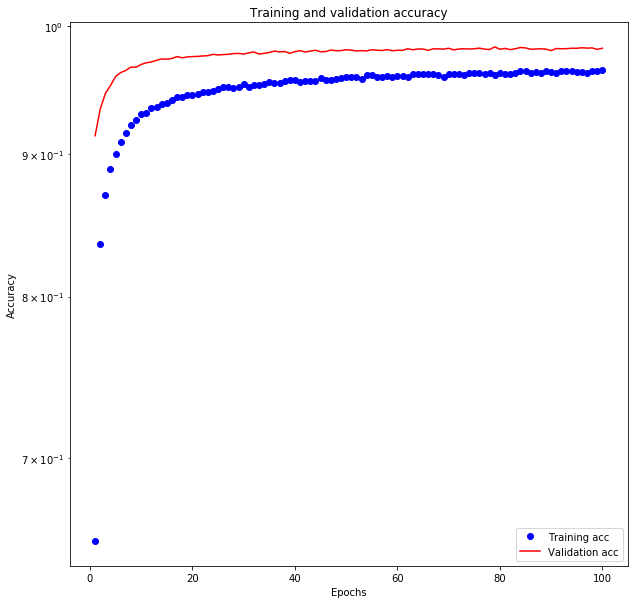

In [13]:
if epochs > 2:
    history_dict = history.history
    acc_values = history_dict['acc']
    epochs_range = range(1, epochs + 1)
    val_acc_values = history_dict['val_acc']
    plt.figure(figsize = (10, 10))
    plt.semilogy(epochs_range, acc_values, 'bo', label='Training acc')
    plt.semilogy(epochs_range, val_acc_values, 'red', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()